## Nearest Neigbhor Cross-Matching

Code to generate beautifull histograms for initial nearest neigbhor cross-matching, as an alternative to TOPCAT.

In [ ]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
observatory = '/data/mfonseca/'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

In [ ]:
# EMU catalog
emu_catalog_path = directory + 'survey_data/EMU_data/EMU_0102-32/EMU_0102-32_comps_1comp_clean.fits'

# DES catalogs
desy6gold_catalog_path = directory + 'survey_data/DES_data/DESY6GOLD_in_EMU_0102-32_clean.fits'

# VIKING DR5 catalogs
vikingdr5_catalog_path = directory + 'survey_data/VIKING_data/VIKINGDR5_in_EMU_0102-32_clean.fits'

# CatWISE catalogs
catwise_catalog_path = directory + 'survey_data/CATWISE_data/CATWISE2020_in_EMU_0102-32_clean.fits'

In [ ]:
# EMU
emu_table = Table.read(emu_catalog_path)
emu_catalog_df = emu_table.to_pandas()

emu_coords = SkyCoord(ra=emu_catalog_df['ra_deg_cont'].values * u.deg,
                      dec=emu_catalog_df['dec_deg_cont'].values * u.deg)

# DES Y6 GOLD
desy6gold_table = Table.read(desy6gold_catalog_path)
desy6gold_catalog_df = desy6gold_table.to_pandas()

desy6gold_coords = SkyCoord(ra=desy6gold_catalog_df['ra'].values * u.deg,
                         dec=desy6gold_catalog_df['dec'].values * u.deg)


# VIKING DR5
viking_table = Table.read(vikingdr5_catalog_path)
viking_catalog_df = viking_table.to_pandas()

viking_coords = SkyCoord(ra=viking_catalog_df['ra'].values * u.deg,
                         dec=viking_catalog_df['dec'].values * u.deg)

# CatWISE 2020
catwise_table = Table.read(catwise_catalog_path)
catwise_catalog_df = catwise_table.to_pandas()

catwise_coords = SkyCoord(ra=catwise_catalog_df['ra'].values * u.deg,
                         dec=catwise_catalog_df['dec'].values * u.deg)


In [ ]:
def crossmatch_separation(cat1, cat2):

    idx, d2d, _ = cat1.match_to_catalog_sky(cat2)
    separation = d2d.arcsec

    return separation

## EMU x DES

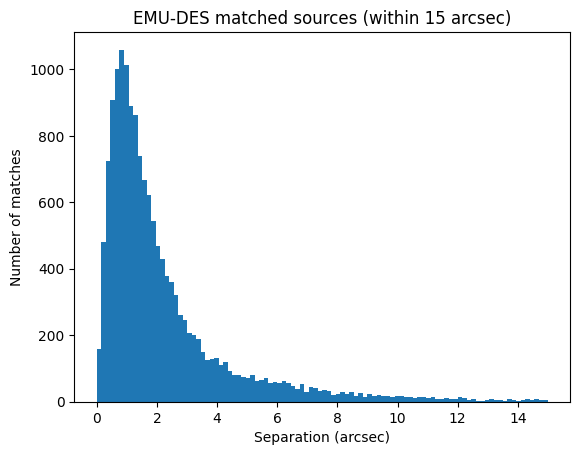

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(desy6gold_coords)

max_sep = 15 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = desy6gold_coords[idx[match_mask]]
separation_des = d2d[match_mask].arcsec

plt.hist(separation_des, bins=100, color='blue')
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.show()

## EMU x VIKING

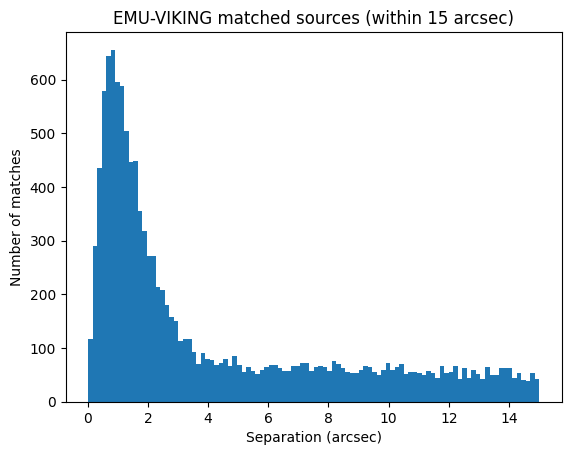

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(viking_coords)

max_sep = 15 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = viking_coords[idx[match_mask]]
separation_viking = d2d[match_mask].arcsec

plt.hist(separation_viking, bins=100, color='red')
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.show()

## EMU x CatWISE

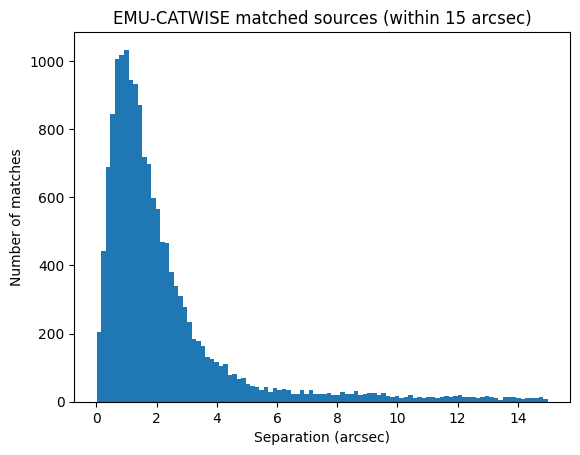

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(catwise_coords)

max_sep = 15 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = catwise_coords[idx[match_mask]]
separation_catwise = d2d[match_mask].arcsec

plt.hist(separation_catwise, bins=100, color='green')
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.show()

## Combined Histogram

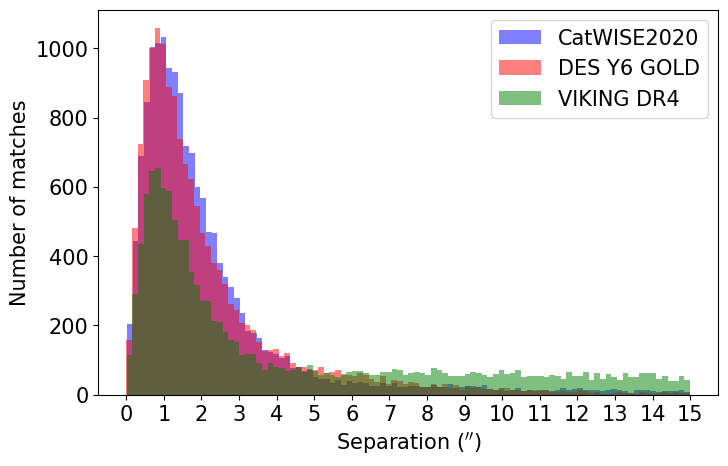

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(separation_catwise, bins=100, color='blue', alpha=0.5, label = 'CatWISE2020')
plt.hist(separation_des, bins=100, color='red', alpha=0.5, label = 'DES Y6 GOLD')
plt.hist(separation_viking, bins=100, color='green', alpha=0.5,  label = 'VIKING DR4')
plt.xlabel(r"Separation ($^{\prime\prime}$)", fontsize=15)
plt.ylabel("Number of matches", fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15], fontsize = 15)
plt.yticks(fontsize = 15)
#plt.yscale('log')
plt.legend(fontsize=15)
plt.savefig('/home/polaris/Lab_Astro/images/emu_crossmatch_separation.png', bbox_inches='tight')
plt.show()

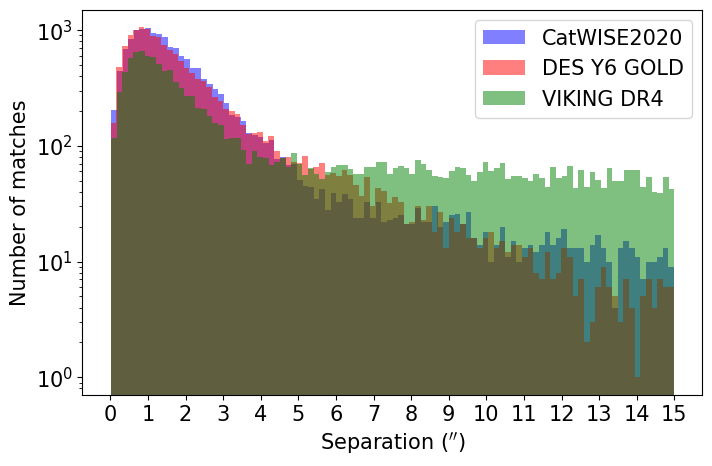

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(separation_catwise, bins=100, color='blue', alpha=0.5, label = 'CatWISE2020')
plt.hist(separation_des, bins=100, color='red', alpha=0.5, label = 'DES Y6 GOLD')
plt.hist(separation_viking, bins=100, color='green', alpha=0.5,  label = 'VIKING DR4')
plt.xlabel(r"Separation ($^{\prime\prime}$)", fontsize=15)
plt.ylabel("Number of matches", fontsize=15)
#plt.title("EMU matched sources (within 10 arcsec)", fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15], fontsize = 15)
plt.yticks(fontsize = 15)
plt.yscale('log')
plt.legend(fontsize=15)
plt.savefig('/home/polaris/Lab_Astro/images/emu_crossmatch_separation_log.png', bbox_inches='tight')
plt.show()

## Count numbers

In [ ]:
# Find EMU indices with matches in each survey
max_radius = 5 * u.arcsec

emu_idx_des = np.where((d2d := emu_coords.match_to_catalog_sky(desy6gold_coords)[1]) > max_radius)[0]
emu_idx_viking = np.where((d2d := emu_coords.match_to_catalog_sky(viking_coords)[1]) > max_radius)[0]
emu_idx_catwise = np.where((d2d := emu_coords.match_to_catalog_sky(catwise_coords)[1]) > max_radius)[0]

# Find EMU indices that are present in all three sets
emu_idx_all = np.intersect1d(emu_idx_des, emu_idx_viking)
emu_idx_all = np.intersect1d(emu_idx_all, emu_idx_catwise)

# Count the number of EMU sources with matches in all three surveys
n_emu_all_matched = len(emu_idx_all)
print(f"Number of EMU sources matched in all three surveys: {n_emu_all_matched}")

NameError: name 'u' is not defined

In [ ]:
# Get the matched EMU sources
emu_matched = emu_catalog_df.iloc[emu_idx_all].reset_index(drop=True)

# For each matched EMU source, find the closest match in each survey (within 15 arcsec)
des_matches = desy6gold_catalog_df.iloc[emu_coords[emu_idx_all].match_to_catalog_sky(desy6gold_coords)[0]].reset_index(drop=True)
viking_matches = viking_catalog_df.iloc[emu_coords[emu_idx_all].match_to_catalog_sky(viking_coords)[0]].reset_index(drop=True)
catwise_matches = catwise_catalog_df.iloc[emu_coords[emu_idx_all].match_to_catalog_sky(catwise_coords)[0]].reset_index(drop=True)

# Optionally, add suffixes to columns to avoid name clashes
emu_matched = emu_matched.add_prefix('EMU_')
des_matches = des_matches.add_prefix('DESY6_')
viking_matches = viking_matches.add_prefix('VKG_')
catwise_matches = catwise_matches.add_prefix('CAT_')

# Concatenate all information into a single DataFrame
emu_all_matched_full = pd.concat([emu_matched, des_matches, viking_matches, catwise_matches], axis=1)

print(f"Shape of combined matched DataFrame: {emu_all_matched_full.shape}")
# emu_all_matched_full now contains all EMU sources matched in all three surveys with info from all catalogs

Shape of combined matched DataFrame: (2269, 124)


In [ ]:
# Define the columns required for full photometric coverage
photometric_columns = [
    'DESY6_mag_auto_g_extcorr',
    'VKG_mag_petro_y_ab_extcorr',
    'CAT_w1mpro_ab',
    'DESY6_g_r_extcorr',
    'DESY6_r_i_extcorr',
    'DESY6_i_z_extcorr',
    'VKG_y_j_petro_extcorr',
    'VKG_j_h_petro_extcorr',
    'VKG_h_ks_petro_extcorr',
    'CAT_w1_w2_ab'
]

# Count how many have full photometric coverage (no NaN in any required column)
full_phot_coverage_mask = ~emu_all_matched_full[photometric_columns].isna().any(axis=1)
n_full_phot_coverage = full_phot_coverage_mask.sum()

print(f"Number of EMU sources matched in all three surveys with full photometric coverage: {n_full_phot_coverage}")

# DataFrame with only those with full photometric coverage
emu_all_matched_full_phot = emu_all_matched_full[full_phot_coverage_mask].reset_index(drop=True)

Number of EMU sources matched in all three surveys with full photometric coverage: 1883
